In [1]:
from langchain.vectorstores import Chroma
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain.chains import VectorDBQA
from sentence_transformers import SentenceTransformer
import pandas as pd

/Volumes/External/opt/anaconda3/envs/ollama2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import umap

In [3]:
%cd /Volumes/External/source/GTPracticum/data 
%ls -salh

/Volumes/External/source/GTPracticum/data
total 13156920
      0 drwxr-xr-x   22 kariato  staff   704B Mar  4 11:00 ./
      0 drwxr-xr-x    7 kariato  staff   224B Mar  4 10:34 ../
     16 -rw-r--r--@   1 kariato  staff   6.0K Feb 10 14:58 .DS_Store
  27280 -rw-r--r--@   1 kariato  staff    13M Feb 21 00:04 2023-10-eb-big-book-of-mlops-2nd-edition-v2-102723-final (1).pdf
  27280 -rw-r--r--@   1 kariato  staff    13M Feb 20 10:15 2023-10-eb-big-book-of-mlops-2nd-edition-v2-102723-final.pdf
    464 -rw-r--r--@   1 kariato  staff   232K Feb 10 16:00 9deec473-6ab3-4c90-a2ec-86ae93b0a6e6.pdf
 733000 -rw-r--r--@   1 kariato  staff   358M Feb 10 14:56 archive (1).zip
      0 drwxr-xr-x    4 kariato  staff   128B Mar  5 11:36 chroma2_db/
      0 drwxr-xr-x    4 kariato  staff   128B Mar  5 11:36 chroma3_db/
      0 drwxr-xr-x    4 kariato  staff   128B Mar  5 11:36 chroma_db/
2785400 -rw-rw-r--@   1 kariato  staff   1.3G Sep 19  2019 emails.csv
2099696 -rw-r--r--    1 kariato  staff   1.0G Fe

/Volumes/External/opt/anaconda3/envs/ollama2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import re
def cleanText(text):
        
    text = text.replace('\\n','')
    text = text.replace('\\','')
    text = re.sub(' +', ' ', text)
    text = text.replace('\t', '')
    text = text.replace('\n', '')
    return text

In [5]:
topics={}

In [6]:
embedding_function2 = SentenceTransformerEmbeddings(model_name="all-mpnet-base-v2")
db2 = Chroma(embedding_function=embedding_function2,persist_directory="./chroma2_db")

/Volumes/External/opt/anaconda3/envs/ollama2/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [7]:
query = "mark to market accounting offsetting concerns hiding losses"
docs = db2.similarity_search_with_score(query,k=400)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        topics[details]='red'

#topics

In [8]:
query = "mark to market accounting offsetting concerns hiding losses"
docs = db2.similarity_search_with_score(query,k=400)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        topics[details]='red'

#topics

In [9]:
query = "remove records"
docs = db2.similarity_search_with_score(query,k=400)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        topics[details]='green'

#topics

In [10]:
query = "illegal accounting practices"
docs = db2.similarity_search_with_score(query,k=400)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        topics[details]='blue'

#topics

In [11]:
query = "lets meet tomorrow"
docs = db2.similarity_search_with_score(query,k=400)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        topics[details]='yellow'

#topics

In [13]:
enron_df=pd.read_csv('enron_processed.csv')

In [14]:
print(enron_df.shape)
enron_df.drop_duplicates(subset='body_short',inplace=True) 
print(enron_df.shape)


(517401, 15)
(246415, 15)


In [15]:
enron_df.drop(['body','raw'],axis=1,inplace=True)

In [16]:

enron_df=enron_df[enron_df['body_short'].str.len()>30]
enron_sampple_df= enron_df.sample(1000)
enron_data=enron_sampple_df['body_short'].tolist()

In [17]:


for doc in enron_data:
    details = cleanText(doc)
    if details not in topics:
        topics[details]='grey'
#topics

In [18]:
enron_details = []
enron_colors = []
for i,j in topics.items():
    enron_details.append(i)
    enron_colors.append(j)


In [19]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [20]:
import numpy as np
from tqdm.auto import tqdm

batch_size = 16
n = len(enron_details)
embeds = np.zeros((n, embedding_model.get_sentence_embedding_dimension()))

for i in tqdm(range(0, n, batch_size)):
    i_end = min(i+batch_size, n)
    batch = enron_details[i:i_end]
    batch_embed = embedding_model.encode(batch)
    embeds[i:i_end,:] = batch_embed

100%|██████████| 91/91 [00:12<00:00,  7.49it/s]


100%|██████████| 9/9 [00:26<00:00,  2.98s/it]


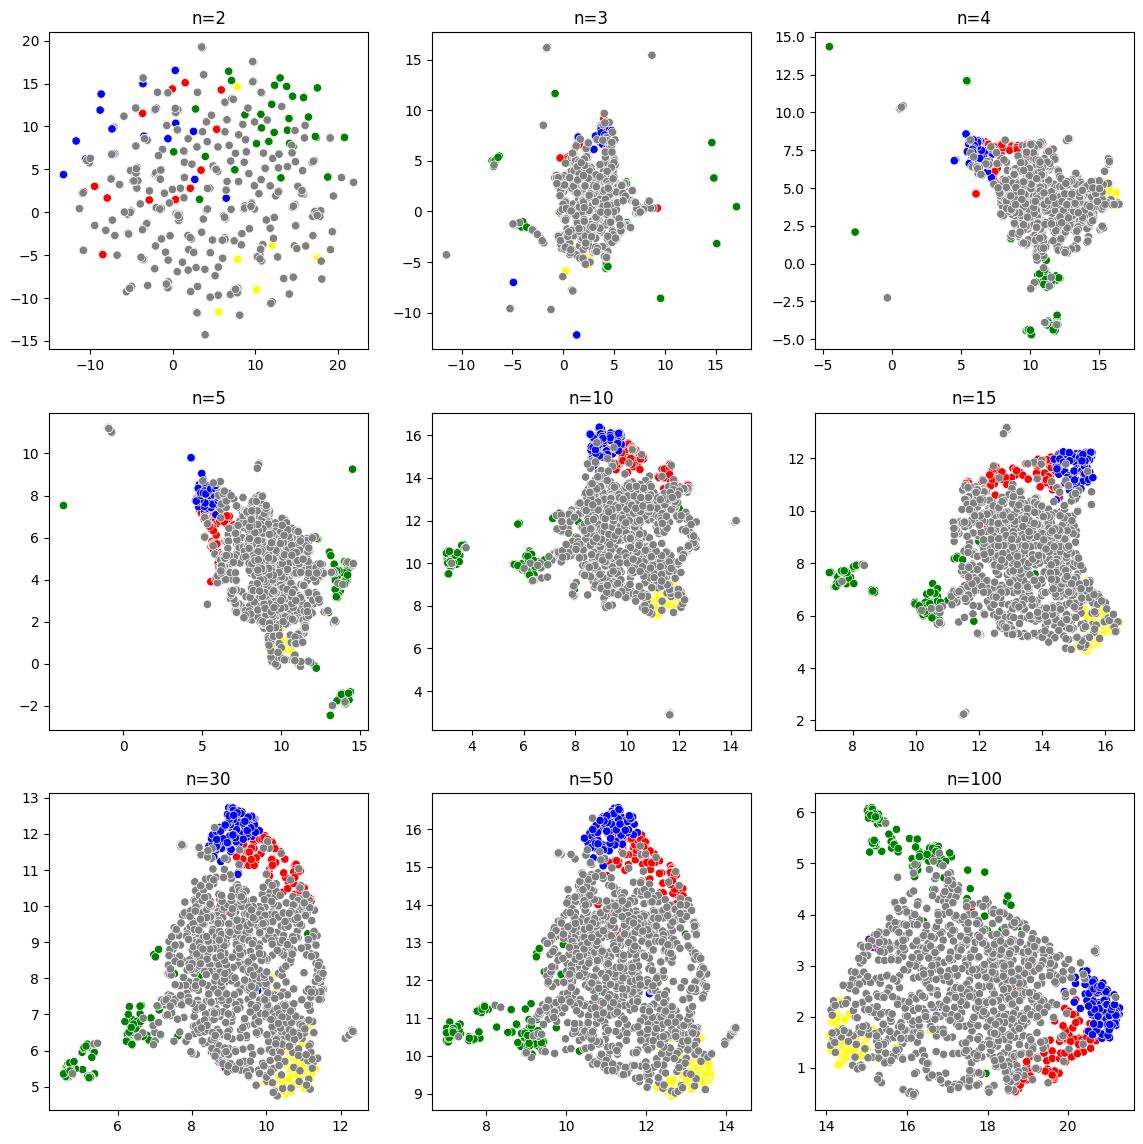

In [21]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
import matplotlib.colors as mcolors
import random
hex_colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(hex_colors)

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(embeds)
    #uColor=kmeans.fit_predict(u)
    #c=[hex_colors[i] for i in uColor]
    sns.scatterplot(x=u[:,0], y=u[:,1], c=enron_colors, ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1